In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# np.seterr(all='ignore')

In [2]:
initial_data = np.genfromtxt("kc_house_data.csv",delimiter=",") #if locally saved
# download from https://github.com/Alex-ley/Machine_learning_articles/blob/Part-2/kc_house_data.csv
# or use directly from https://raw.githubusercontent.com/Alex-ley/Machine_learning_articles/Part-2/kc_house_data.csv
iterations = 500
learning_rate = 0.000000001
initial_m = 0
initial_b = 0

In [3]:
initial_data = pd.read_csv("kc_house_data.csv")

In [4]:
initial_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
initial_X_act = initial_data['sqft_living']
initial_Y_act = initial_data['price']

In [6]:
X_act = initial_X_act.to_numpy(dtype=np.float64)
Y_act = initial_Y_act.to_numpy(dtype=np.float64)

Text(0, 0.5, 'Housing Price')

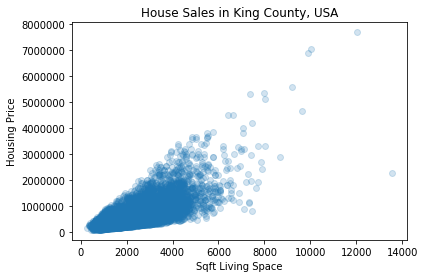

In [7]:
# X_act = inital_X_act.as_matrix()
# Y_act = inital_Y_act.as_matrix()
plt.scatter(x=X_act,y=Y_act,alpha=0.2)
plt.title('House Sales in King County, USA')
plt.xlabel('Sqft Living Space')
plt.ylabel('Housing Price')

In [8]:
X = X_act.reshape(-1,1) # reshape turns the array into a 1-D Matrix (x matrix)
ones_v = np.ones([X.shape[0], 1]) # create a array containing only ones (to multiply by b or theta-1)
ones_h = ones_v.reshape(1,-1) # create a array containing only ones (to multiply by b or theta-1)
X = np.concatenate([ones_v, X],1) # cocatenate the ones to X matrix
y = Y_act.reshape(-1,1) # create the y matrix, -1 tells numpy to figure out the dimension by itself
initial_theta = np.array([[0,0]])

In [9]:
ones_h, initial_theta

(array([[1., 1., 1., ..., 1., 1., 1.]]), array([[0, 0]]))

In [10]:
def computeCostAndDerivatives(X,y,theta,learning_rate):
    cost = ones_h @ ((X @ theta.T - y)*(X @ theta.T - y)) # @ makes np perform matrix multiplication        
    avg_cost = np.around(cost / float(len(X)),decimals=2)
    
    theta = theta - ((2*learning_rate)/len(X)) * (ones_h@((X @ theta.T - y)*X)) #brackets are very important for Matrix algebra here
    
    return avg_cost, theta

In [11]:
avg_cost, theta = computeCostAndDerivatives(X,y,initial_theta,learning_rate)

In [12]:
avg_cost, theta

(array([[4.26471343e+11]]), array([[1.08017628e-03, 2.72006732e+00]]))

In [13]:
def gradientDescent(X,y,theta,iterations,learning_rate,print_progress=False):
    avg_cost_array = []
    for i in range(iterations):
        avg_cost, theta = computeCostAndDerivatives(X,y,theta,learning_rate)
        if print_progress and i % (iterations / 5) ==0:
            print("avg_cost:",avg_cost)
            print("theta:", theta,"\n")
        avg_cost_array.append(avg_cost)
    return avg_cost, theta, avg_cost_array

In [14]:
avg_cost, final_theta, avg_cost_array = gradientDescent(X,y,initial_theta,iterations,learning_rate)

In [15]:
print(f"after {iterations} iterations, the avg_cost={avg_cost} theta={final_theta}")

after 500 iterations, the avg_cost=[[6.8672389e+10]] theta=[[9.81548463e-02 2.61632549e+02]]


Text(0, 0.5, 'Housing Price')

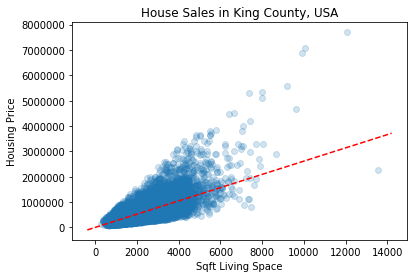

In [16]:
plt.scatter(X_act, Y_act,alpha=0.2)
axes = plt.gca() #get current axes
x_vals = np.array(axes.get_xlim())
x_vals_matrix = np.concatenate([np.ones([2,1]),x_vals.reshape(-1,1)],1)
# y_vals = final_theta[0][1]* x_vals + final_theta[0][0] #this is a simple case when y = mx + b
y_vals = ((x_vals_matrix @ final_theta.T).T).flatten() #this is a more general case using matrix algebra
plt.plot(x_vals, y_vals, 'r--')
plt.title('House Sales in King County, USA')
plt.xlabel('Sqft Living Space')
plt.ylabel('Housing Price')

Text(0, 0.5, 'Avg_cost')

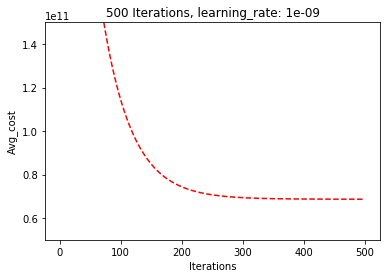

In [17]:
epochs = np.array(np.linspace(1,iterations,num=iterations)).reshape(-1,1)
y_axis_cost = np.array(avg_cost_array,dtype='object').reshape(-1,1) #dtype= np.longdouble np.float64 etc.
plt.title(f"500 Iterations, learning_rate: {learning_rate}")
plt.ylim((5e10,1.5e11))
plt.plot(epochs, y_axis_cost , 'r--')
plt.xlabel('Iterations')
plt.ylabel('Avg_cost')

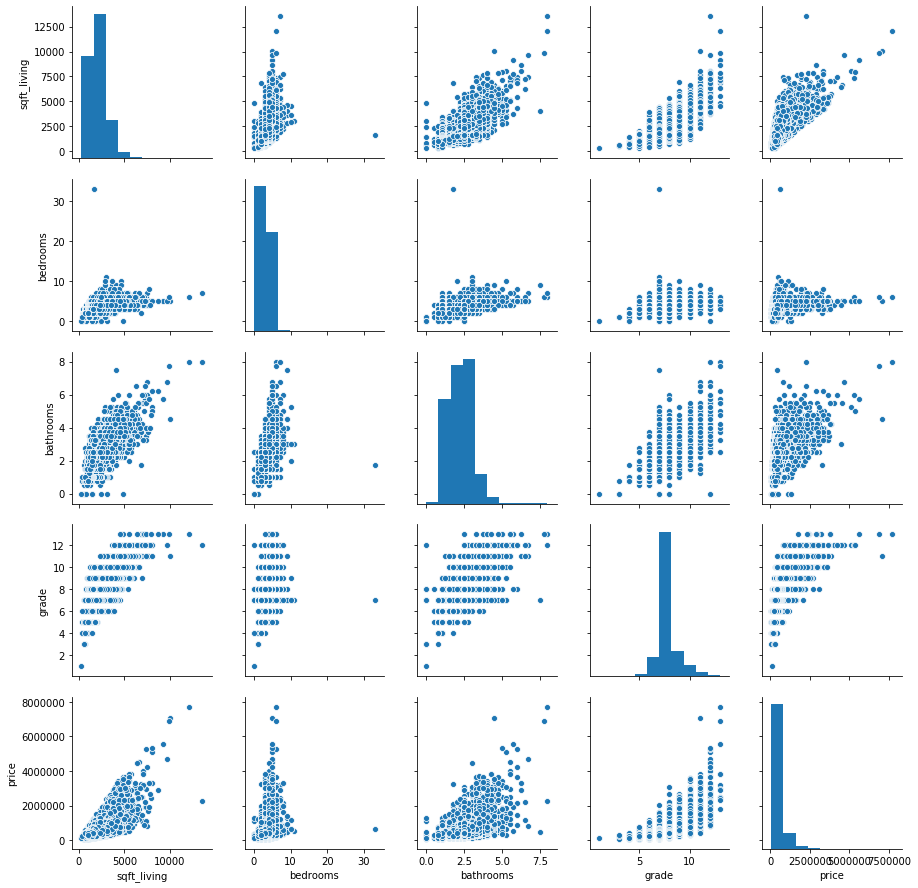

In [18]:
sns.pairplot(initial_data[['sqft_living','bedrooms','bathrooms','grade','price']])

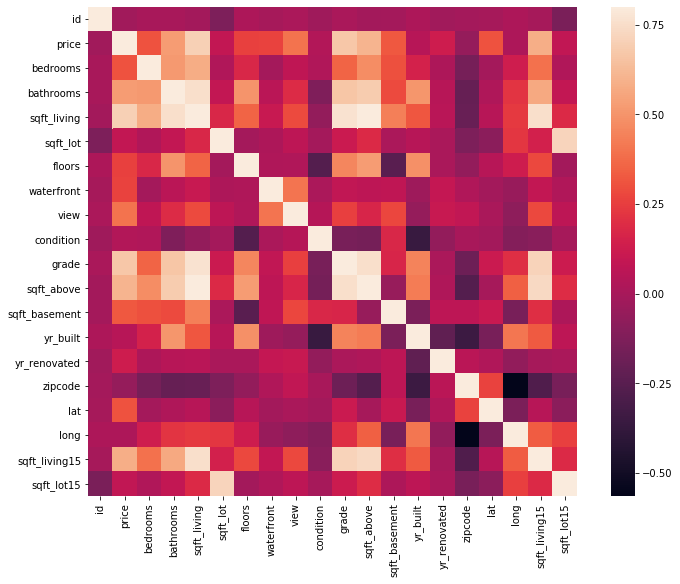

In [19]:
#correlation matrix
corrmat = initial_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

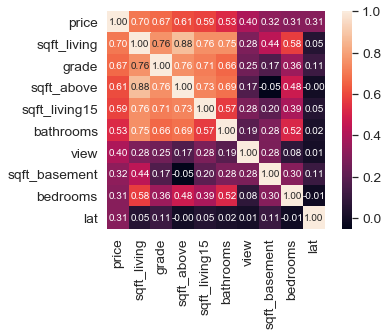

In [20]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(initial_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [206]:
def polynomialRegression(poly_order,initial_X,initial_Y,learning_rate,iterations,print_progress=False):
    initial_X_act = initial_X
    initial_Y_act = initial_Y
    column_name = initial_X_act.columns[0]
    if print_progress: print(initial_X_act.head(5))
    if (poly_order > 1):
        for i in range(2,poly_order+1):
            initial_X_act.loc[:,f'{column_name}^{i}'] = initial_X_act[column_name].to_numpy() **i
        
    if print_progress: print(initial_X_act.head(5))
    features = len(initial_X_act.columns)
    #initial_Y_act = initial_data['price']
    X_act = initial_X_act.to_numpy(dtype=np.float64).reshape(-1,features)
    Y_act = initial_Y_act.to_numpy(dtype=np.float64).reshape(-1,1)
    #learning_rate = 0.00001
    ones_v = np.ones([X_act.shape[0], 1])
    ones_h = ones_v.reshape(1,-1)
    X = np.concatenate([ones_v, X_act],1)
    initial_theta = np.zeros(features+1).reshape(-1,features+1)

    #learning_rate_array = np.array([[learning_rate, learning_rate/10, learning_rate/100, learning_rate/1000]])
    learning_rate_array = np.array([[learning_rate]])
    for i in range(1,features+1):
        learning_rate_array = np.concatenate([learning_rate_array,np.array([[learning_rate]])/(np.mean(X[:,i])*np.std(X[:,i]))],1)
        #Not sure how valid this is but it seems to work, for me it makes sense and is easier than feature scaling
        if print_progress:
            print(f'mean {i}:', np.mean(X[:,i]))
            print(f'median {i}:', np.median(X[:,i]))
            print(f'max {i}:', np.max(X[:,i]))
            print(f'std {i}:', np.std(X[:,i]))
    if print_progress: print('learning_rate_array:', learning_rate_array)
    
    avg_cost, final_theta, avg_cost_array = gradientDescent(X,Y_act,initial_theta,iterations,learning_rate_array,print_progress)
    print(f"after {iterations} iterations, the avg_cost={avg_cost} \ntheta={final_theta}")
    
    plotPolynomialFit(poly_order,iterations,final_theta,avg_cost, avg_cost_array,learning_rate,initial_X_act,Y_act)

In [207]:
def plotPolynomialFit(poly,iterations,final_theta,avg_cost, avg_cost_array,learning_rate,initial_X_act,initial_Y_act):    
    epochs = np.array(np.linspace(1,iterations,num=iterations)).reshape(-1,1)
    y_axis_cost = np.array(avg_cost_array,dtype='object').reshape(-1,1) #dtype= np.longdouble np.float64 etc.

    plt.figure(figsize=[12, 5])
    plt.subplot(121)
    plt.title(f"{iterations} Iterations, learning_rate: {learning_rate}")
    plt.plot(epochs, y_axis_cost , 'r--')
    axes = plt.gca() #get current axes
    plt.ylim((axes.get_ylim()[1]/10,axes.get_ylim()[1]/2))
    plt.xlabel('Iterations')
    plt.ylabel('Avg_cost')
    plt.text(0, axes.get_ylim()[0] *1.05, f'Mean Squared Error {avg_cost[0]}')

    column_name = initial_X_act.columns[0]
    X_act_order1 = initial_X_act[column_name].to_numpy(dtype=np.float64).reshape(-1,1)
    plt.subplot(122)
    plt.scatter(X_act_order1, initial_Y_act,alpha=0.2)
    axes = plt.gca() #get current axes
    x_vals = np.linspace(start=axes.get_xlim()[0],stop=axes.get_xlim()[1],num=50)
    x_vals_matrix = np.ones([x_vals.shape[0],1])
    for i in range(1,poly+1):
        x_vals_matrix = np.concatenate([x_vals_matrix,x_vals.reshape(-1,1)**i],1)

    y_vals = ((x_vals_matrix @ final_theta.T).T).flatten() #this is a general case using matrix algebra
    plt.plot(x_vals, y_vals, 'r--')
    plt.title('House Sales in King County, USA')
    plt.xlabel('Grade')
    plt.ylabel('Housing Price')
    plt.text(2, 4000000, f'Polynomial Fit order {poly}')

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
    plt.show()

after 2500 iterations, the avg_cost=[[7.474e+10]] 
theta=[[-1048609.863   207506.017]]


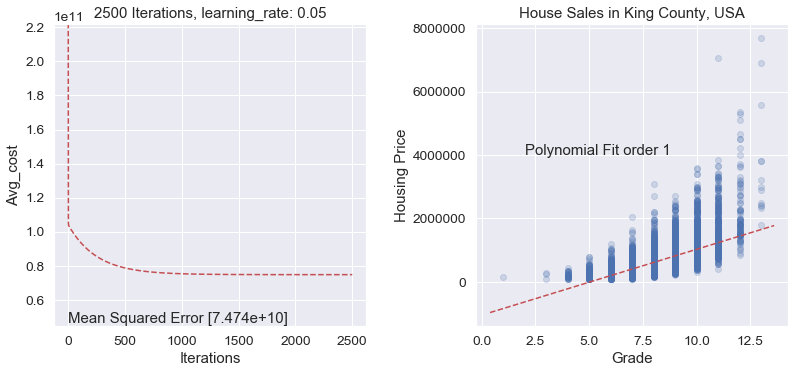

In [209]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 1
_learning_rate = 0.05
_iterations = 2500
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

after 1000 iterations, the avg_cost=[[6.961e+10]] 
theta=[[-130984.288  -33055.995   15381.998]]


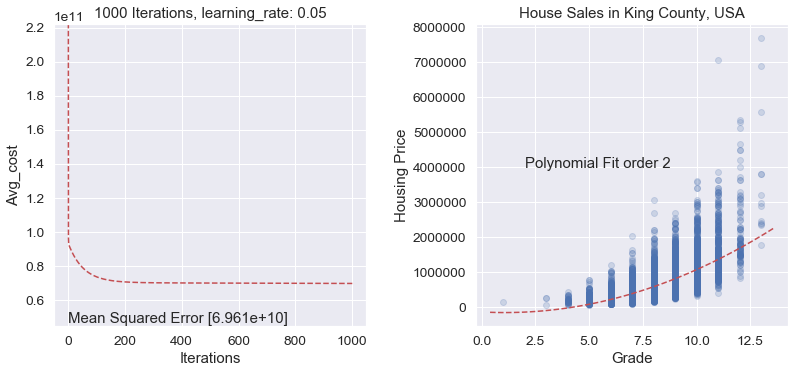

In [210]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 2
_learning_rate = 0.05
_iterations = 1000
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

after 1000 iterations, the avg_cost=[[6.696e+10]] 
theta=[[ 75724.403 -15915.613   1462.652   1031.612]]


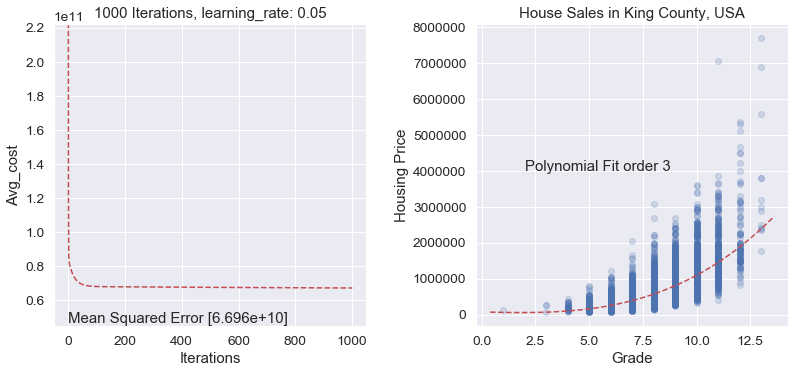

In [211]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 3
_learning_rate = 0.05
_iterations = 1000
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

after 1000 iterations, the avg_cost=[[6.552e+10]] 
theta=[[ 1.149e+05  1.089e+04 -9.820e+02  1.760e+02  7.934e+01]]


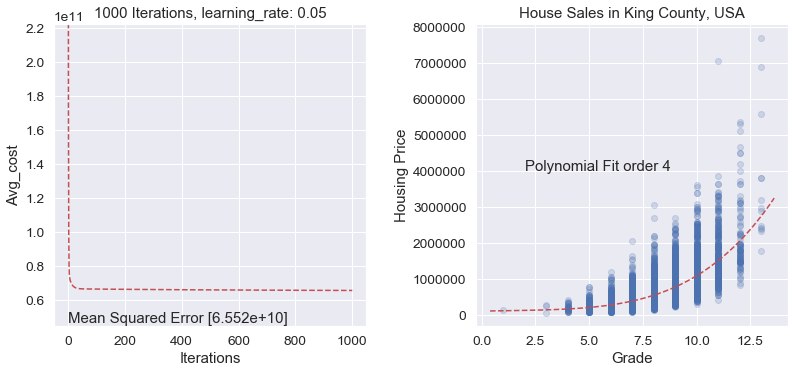

In [212]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 4
_learning_rate = 0.05
_iterations = 1000
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

after 1000 iterations, the avg_cost=[[6.507e+10]] 
theta=[[ 8.802e+04  2.531e+04 -1.580e+02  2.358e+00  1.958e+01  5.618e+00]]


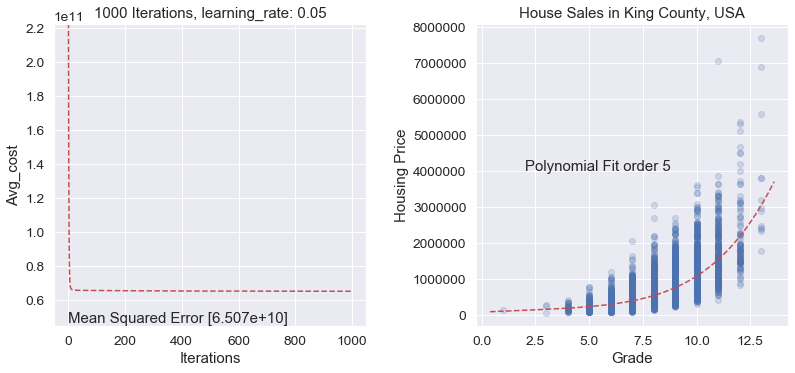

In [213]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 5
_learning_rate = 0.05
_iterations = 1000
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

after 1000 iterations, the avg_cost=[[6.497e+10]] 
theta=[[5.220e+04 2.789e+04 9.944e+02 5.607e+01 7.879e+00 1.697e+00 3.405e-01]]


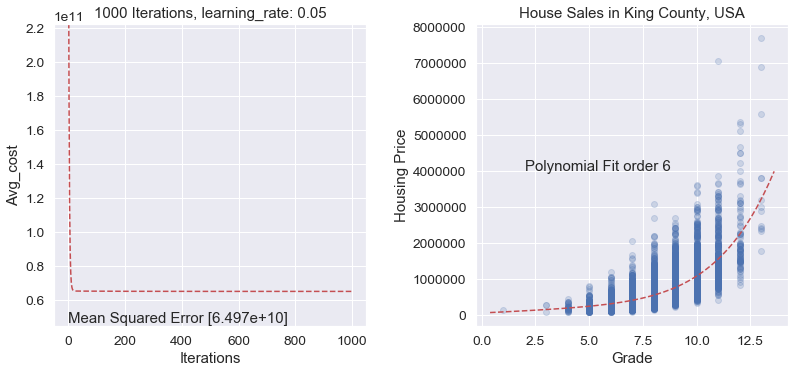

In [216]:
_initial_X_act = pd.DataFrame(data=initial_data[['grade']]) #initial_data['grade']
_initial_Y_act = initial_data['price'] #pd.DataFrame(data=initial_data[['price']])
_poly = 6
_learning_rate = 0.05
_iterations = 1000
np.set_printoptions(precision=3)

polynomialRegression(_poly,_initial_X_act,_initial_Y_act,_learning_rate,_iterations,print_progress=False)

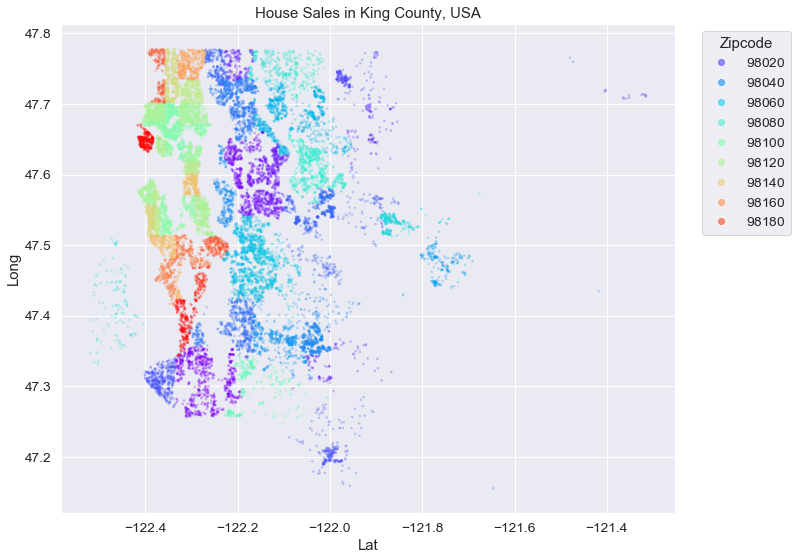

In [194]:
initial_X_act = initial_data['long']
initial_Y_act = initial_data['lat']
initial_Colors = initial_data['zipcode']
c_act = initial_Colors.to_numpy(dtype=np.float64)
X_act = initial_X_act.to_numpy(dtype=np.float64)
Y_act = initial_Y_act.to_numpy(dtype=np.float64)
fig, ax = plt.subplots()
scatter = ax.scatter(x=X_act,y=Y_act,alpha=0.2,c=c_act,s=3,cmap=plt.get_cmap('rainbow')) #'jet'
plt.title('House Sales in King County, USA')
plt.xlabel('Lat')
plt.ylabel('Long')
# produce a legend with the color coding of the zipcodes
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = ax.legend(handles, labels, loc="upper right", title="Zipcode",
                    bbox_to_anchor=(1.2, 1), ncol=1, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(11,9)

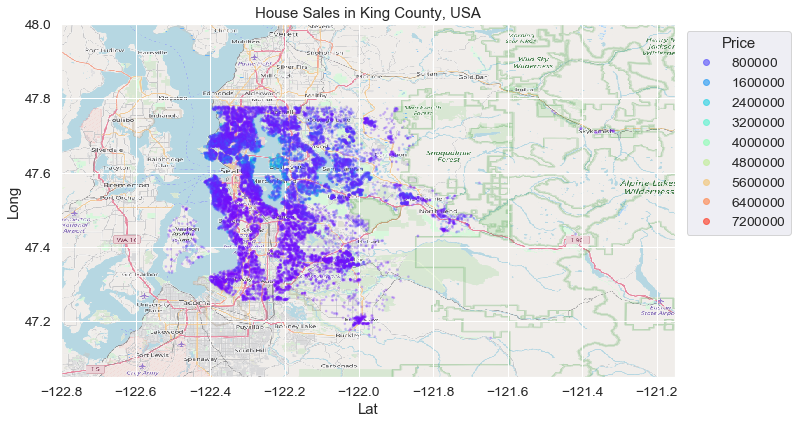

In [195]:
initial_X_act = initial_data['long'] #[initial_data['price'] > 3000000]
initial_Y_act = initial_data['lat'] #[initial_data['price'] > 3000000]
initial_Colors = initial_data['price'] #[initial_data['price'] > 3000000]
c_act = initial_Colors.to_numpy(dtype=np.float64)
X_act = initial_X_act.to_numpy(dtype=np.float64)
Y_act = initial_Y_act.to_numpy(dtype=np.float64)
fig, ax = plt.subplots()
scatter = ax.scatter(x=X_act,y=Y_act,alpha=0.2,c=c_act,s=3,cmap=plt.get_cmap('rainbow')) #'jet'
plt.title('House Sales in King County, USA')
plt.xlabel('Lat')
plt.ylabel('Long')
import matplotlib.image as mpimg
kc_img=mpimg.imread('kc_openstreetmap(-122.8,-121.15,47.05,48.0).png')
plt.imshow(kc_img, extent=[-122.8, -121.15, 47.05, 48.0], alpha=0.8)
# produce a legend with the color coding of the zipcodes
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = ax.legend(handles, labels, loc="upper right", title="Price",
                    bbox_to_anchor=(1.2, 1), ncol=1, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(11,9)

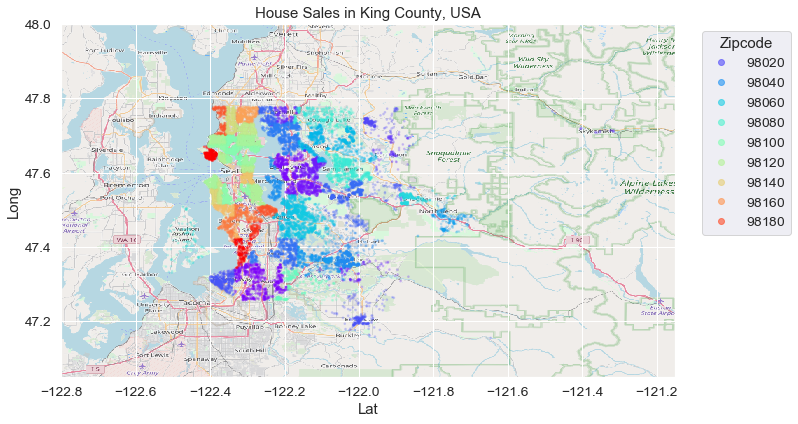

In [196]:
initial_X_act = initial_data['long']
initial_Y_act = initial_data['lat']
initial_Colors = initial_data['zipcode']
c_act = initial_Colors.to_numpy(dtype=np.float64)
X_act = initial_X_act.to_numpy(dtype=np.float64)
Y_act = initial_Y_act.to_numpy(dtype=np.float64)
fig, ax = plt.subplots()
scatter = ax.scatter(x=X_act,y=Y_act,alpha=0.2,c=c_act,s=3,cmap=plt.get_cmap('rainbow')) #'jet'
plt.title('House Sales in King County, USA')
plt.xlabel('Lat')
plt.ylabel('Long')
import matplotlib.image as mpimg
kc_img=mpimg.imread('kc_openstreetmap(-122.8,-121.15,47.05,48.0).png')
plt.imshow(kc_img, extent=[-122.8, -121.15, 47.05, 48.0], alpha=0.8)
# produce a legend with the color coding of the zipcodes
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = ax.legend(handles, labels, loc="upper right", title="Zipcode",
                    bbox_to_anchor=(1.2, 1), ncol=1, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(11,9)

In [31]:
import matplotlib
matplotlib.__version__
#You need version 3.1 for the command scatter.legend_elements above

'3.1.0'

In [54]:
# json_date = pd.read_json('https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/city-council-districts.geojson')